In [101]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import sympy as sp

## 1.1

In [102]:
n = 5000 
p = 0.0001  
G = nx.gnp_random_graph(n,p)
components = sorted(nx.connected_components(G), key=len, reverse=True)
component_sizes = [len(c) for c in components]
total = len(component_sizes)

In [103]:
Ps ={}
for m in component_sizes:
    if m not in Ps:
        Ps[m] = 1
    else:
        Ps[m] += 1
Ps= {k: v/total for k, v in Ps.items()}

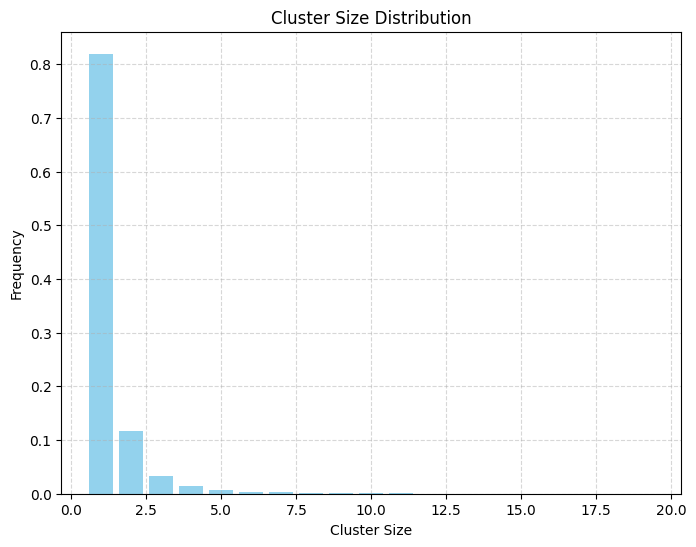

In [104]:
plt.figure(figsize=(8, 6))  # 设置图形大小
plt.bar(list(Ps.keys()), list(Ps.values()),alpha=0.9, color='skyblue')
plt.xlabel('Cluster Size')
plt.ylabel('Frequency')
plt.title('Cluster Size Distribution')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 1.2

In [105]:
degree_1 = [d for n, d in G.degree()]
total = len(degree_1)
degree_count={}
for d in degree_1:
    if d not in degree_count:
        degree_count[d] = 1
    else:
        degree_count[d] += 1

degree_count = {k: v/total for k,v in degree_count.items()}    

In [106]:
degree_count

{0: 0.6214, 1: 0.2924, 2: 0.0698, 3: 0.0144, 4: 0.002}

In [107]:
x = sp.symbols('x')
G_0 = sum([v*(x**k) for k,v in degree_count.items()])
G_1 = G_0.diff(x) / G_0.diff(x).subs(x,1)

In [108]:
H1 = x
for i in range(2):
    H1 = x * G_0.subs("x",H1)

In [109]:
sp.expand(H1)

3.2e-14*x**21 + 9.216e-13*x**20 + 1.442048e-11*x**19 + 1.62980864e-10*x**18 + 1.4585765632e-9*x**17 + 1.08788038656e-8*x**16 + 6.97042808576e-8*x**15 + 3.9044686464e-7*x**14 + 1.9371048101408e-6*x**13 + 8.5740625215232e-6*x**12 + 3.41422260087168e-5*x**11 + 0.000123059485617382*x**10 + 0.000403106873915795*x**9 + 0.00121103054732004*x**8 + 0.00332747858704052*x**7 + 0.00870390197885268*x**6 + 0.0214090511548787*x**5 + 0.0492296957041536*x**4 + 0.112450189608*x**3 + 0.18169736*x**2 + 0.6214*x

In [110]:
H0= x*G_0.subs("x",H1)

In [111]:
sp.expand(H0)

2.097152e-57*x**85 + 2.415919104e-55*x**84 + 1.42170128384e-53*x**83 + 5.6972338528256e-52*x**82 + 1.74782743513661e-50*x**81 + 4.37446427220136e-49*x**80 + 9.2941303456174e-48*x**79 + 1.72230461029565e-46*x**78 + 2.83867378509367e-45*x**77 + 4.22292045445393e-44*x**76 + 5.73542266430595e-43*x**75 + 7.17674368768982e-42*x**74 + 8.33515900449982e-41*x**73 + 9.04029418961488e-40*x**72 + 9.20368133044204e-39*x**71 + 8.83367104208817e-38*x**70 + 8.02309258737678e-37*x**69 + 6.91774748872113e-36*x**68 + 5.67847411304358e-35*x**67 + 4.44851770769802e-34*x**66 + 3.33321726564246e-33*x**65 + 2.39342110356193e-32*x**64 + 1.64981347688011e-31*x**63 + 1.09342075636234e-30*x**62 + 6.97729754564311e-30*x**61 + 4.29228573063902e-29*x**60 + 2.54856872484489e-28*x**59 + 1.46208542096563e-27*x**58 + 8.11228514932333e-27*x**57 + 4.3571356175652e-26*x**56 + 2.26731540704311e-25*x**55 + 1.14397726983862e-24*x**54 + 5.60064996451179e-24*x**53 + 2.66243131751921e-23*x**52 + 1.22977536881132e-22*x**51 + 5.52

In [112]:
Ps_2={}
H0_test=H0.copy()
for i in tqdm(range(1,max(list(Ps.keys()))+1)):
    Ps_2[i] = H0_test.diff(x).subs(x,0)/sp.factorial(i)
    H0_test = H0_test.diff(x)
    print(Ps_2[i])

  5%|▌         | 1/19 [00:00<00:03,  4.78it/s]

0.621400000000000


 11%|█         | 2/19 [00:00<00:05,  2.93it/s]

0.181697360000000


 16%|█▌        | 3/19 [00:01<00:12,  1.31it/s]

0.0800807376720000


 21%|██        | 4/19 [00:03<00:16,  1.13s/it]

0.0520974405242912


 26%|██▋       | 5/19 [00:06<00:27,  1.94s/it]

0.0297830292167310


 32%|███▏      | 6/19 [00:12<00:40,  3.13s/it]

0.0164936722481566


 37%|███▋      | 7/19 [00:21<01:01,  5.15s/it]

0.00890692045393036


 42%|████▏     | 8/19 [00:38<01:37,  8.87s/it]

0.00469471092149332


 47%|████▋     | 9/19 [01:06<02:28, 14.82s/it]

0.00242962637615579


 53%|█████▎    | 10/19 [01:54<03:45, 25.10s/it]

0.00123169321201165


 58%|█████▊    | 11/19 [03:09<05:22, 40.31s/it]

0.000613200036425074


 63%|██████▎   | 12/19 [05:06<07:24, 63.54s/it]

0.000300266444912933


 68%|██████▊   | 13/19 [08:05<09:52, 98.70s/it]

0.000144659503864996


 68%|██████▊   | 13/19 [10:29<04:50, 48.43s/it]


KeyboardInterrupt: 

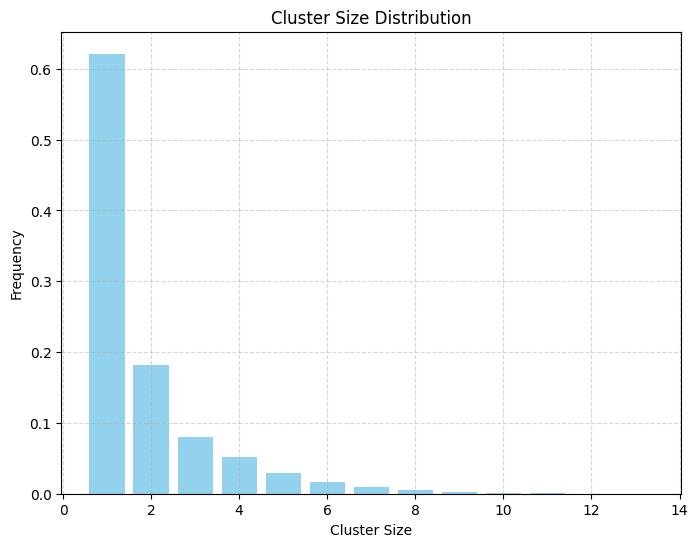

In [113]:
plt.figure(figsize=(8, 6))  # 设置图形大小
plt.bar(list(Ps_2.keys()), list(Ps_2.values()),alpha=0.9, color='skyblue')
plt.xlabel('Cluster Size')
plt.ylabel('Frequency')
plt.title('Cluster Size Distribution')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 2.1

In [169]:
# 定义节点数量
num_nodes = 10000

# 定义平均度
mean_degree = 2

# 生成 Poisson 分布的度序列
degrees = np.random.poisson(mean_degree, num_nodes)

# 创建图
G = nx.Graph()


# 添加节点
G.add_nodes_from(range(num_nodes))

for i, degree in enumerate(degrees):
    neighbors = np.random.choice(range(num_nodes), size=degree, replace=False)
    for neighbor in neighbors:
        if neighbor != i and not G.has_edge(i, neighbor):
            G.add_edge(i, neighbor)

In [170]:
T_values = np.arange(0, 1.1, 0.05)

In [160]:
large_size=[]
def largest_component_size(G):
    return len(max(nx.connected_components(G), key=len))

def update_network(G, T):
    edges_to_remove = []
    for edge in G.edges():
        if np.random.rand() > T:
            edges_to_remove.append(edge)
    G.remove_edges_from(edges_to_remove)
    return G
for i in np.arange(0, 1.1, 0.05):
    G_tmp = G.copy()
    G_tmp=update_network(G_tmp,i)
    large_size.append(largest_component_size(G_tmp))

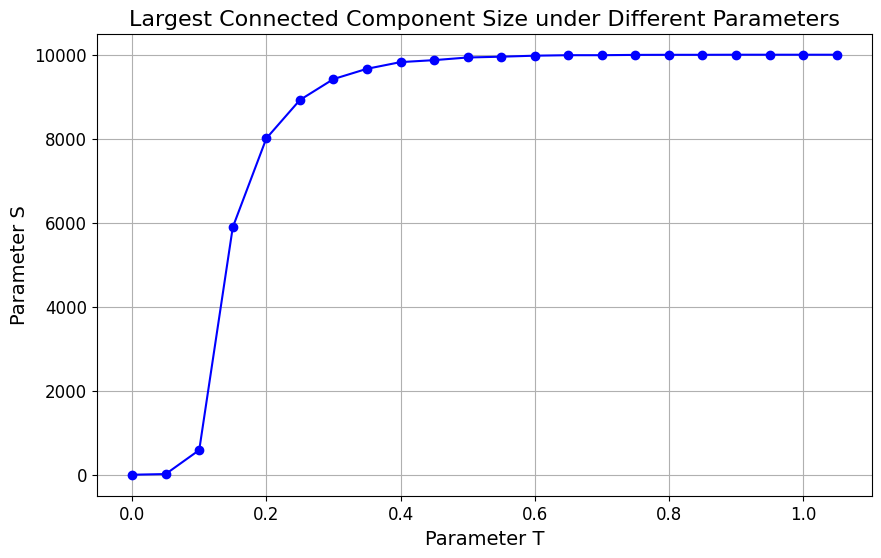

In [168]:
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(T_values, large_size, marker='o', color='b', linestyle='-')
plt.title('Largest Connected Component Size under Different Parameters', fontsize=16)
plt.xlabel('Parameter T', fontsize=14)
plt.ylabel('Parameter S', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

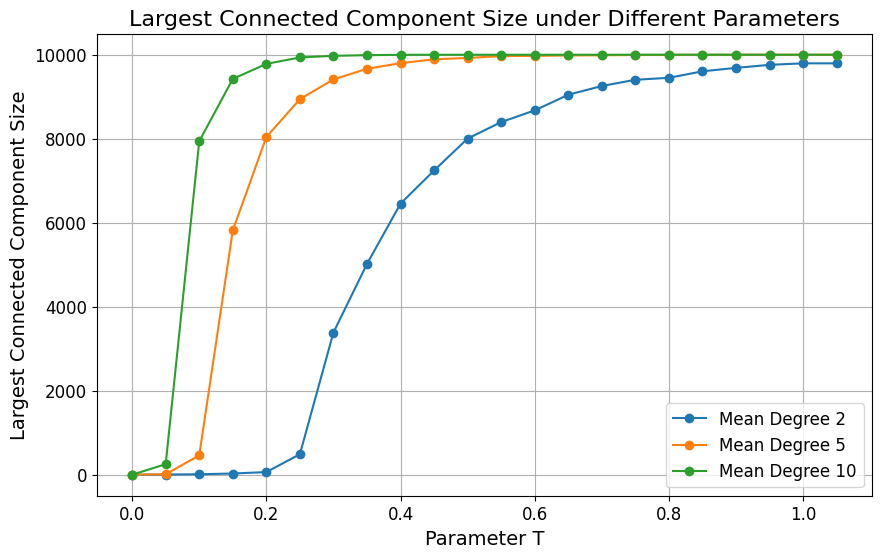

In [171]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the size of the largest connected component
def largest_component_size(G):
    return len(max(nx.connected_components(G), key=len))

# Function to update the network based on a given probability threshold
def update_network(G, T):
    edges_to_remove = []
    for edge in G.edges():
        if np.random.rand() > T:
            edges_to_remove.append(edge)
    G.remove_edges_from(edges_to_remove)
    return G

# Parameters
num_nodes = 10000
T_values = np.arange(0, 1.1, 0.05)
mean_degrees = [2, 5, 10]  # Different average degrees to try

# Plot settings
plt.figure(figsize=(10, 6))
plt.title('Largest Connected Component Size under Different Parameters', fontsize=16)
plt.xlabel('Parameter T', fontsize=14)
plt.ylabel('Largest Connected Component Size', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Experiment with different average degrees
for mean_degree in mean_degrees:
    # Generate Poisson degree sequence
    degrees = np.random.poisson(mean_degree, num_nodes)
    
    # Create graph
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))
    
    # Add edges
    for i, degree in enumerate(degrees):
        neighbors = np.random.choice(range(num_nodes), size=degree, replace=False)
        for neighbor in neighbors:
            if neighbor != i and not G.has_edge(i, neighbor):
                G.add_edge(i, neighbor)
    
    # Record the size of the largest connected component for each parameter value
    large_size = []
    for T in T_values:
        G_tmp = G.copy()
        G_tmp = update_network(G_tmp, T)
        large_size.append(largest_component_size(G_tmp))
    
    # Plot the results for this average degree
    plt.plot(T_values, large_size, marker='o', label=f'Mean Degree {mean_degree}')

# Add legend
plt.legend(fontsize=12)
plt.show()


## 2.2

In [ ]:
# Function to calculate the size of the largest connected component
def largest_component_size(G):
    return len(max(nx.connected_components(G), key=len))

# Function to update the network based on a given probability threshold
def update_network(G, T):
    edges_to_remove = []
    for edge in G.edges():
        if np.random.rand() > T:
            edges_to_remove.append(edge)
    G.remove_edges_from(edges_to_remove)
    return G

num_nodes = 10000
T_values = np.arange(0, 1.1, 0.05)
gamma = 2.5 

degrees = np.random.zipf(a=gamma, size=num_nodes)

degrees = degrees[degrees <= np.sqrt(num_nodes)]
sum_degrees = np.sum(degrees)
if sum_degrees % 2 != 0:
    degrees[np.random.randint(num_nodes)] += 1
# Create graph
G = nx.configuration_model(degrees)

G = nx.Graph(G)

large_size = []
for T in T_values:
    G_tmp = G.copy()
    G_tmp = update_network(G_tmp, T)
    large_size.append(largest_component_size(G_tmp))


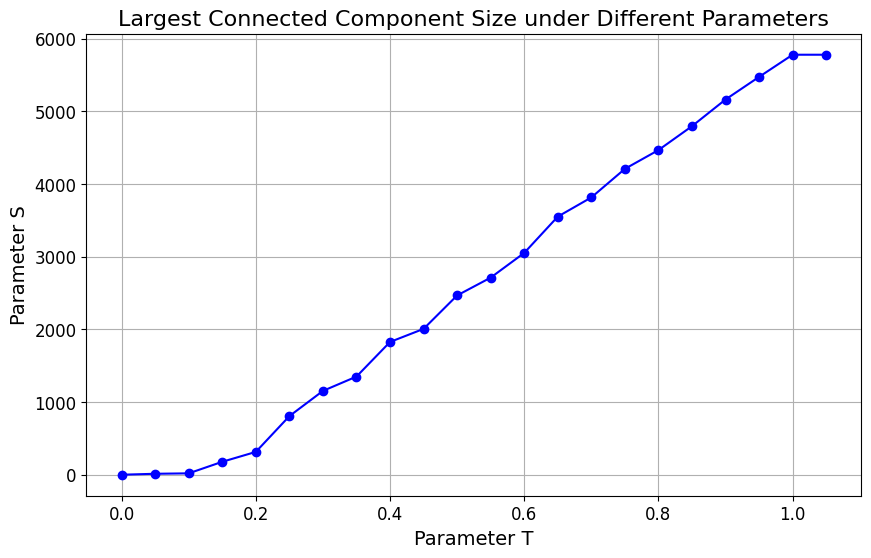

In [175]:
# Plot settings
plt.figure(figsize=(10, 6))
plt.title('Largest Connected Component Size under Different Parameters', fontsize=16)
plt.xlabel('Parameter T', fontsize=14)
plt.ylabel('Parameter S', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.plot(T_values, large_size, marker='o', color='b', linestyle='-')

plt.show()